In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Load the dataset
df = pd.read_csv('C:\\Users\\aswin\\OneDrive\\Desktop\\Torch Projects\\Chicken-Disease\\Notebooks\\tempdata.csv')

# Select features for analysis|
features = list(df.columns[1:])
X = df[features]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## Anomaly Detection using Isolation Forest

In [6]:
from sklearn.ensemble import IsolationForest

# Initialize and fit model
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['anomaly'] = iso_forest.fit_predict(X_scaled)

# Map -1 (anomaly), 1 (normal)
df['anomaly'] = df['anomaly'].map({-1: 'Anomaly', 1: 'Normal'})


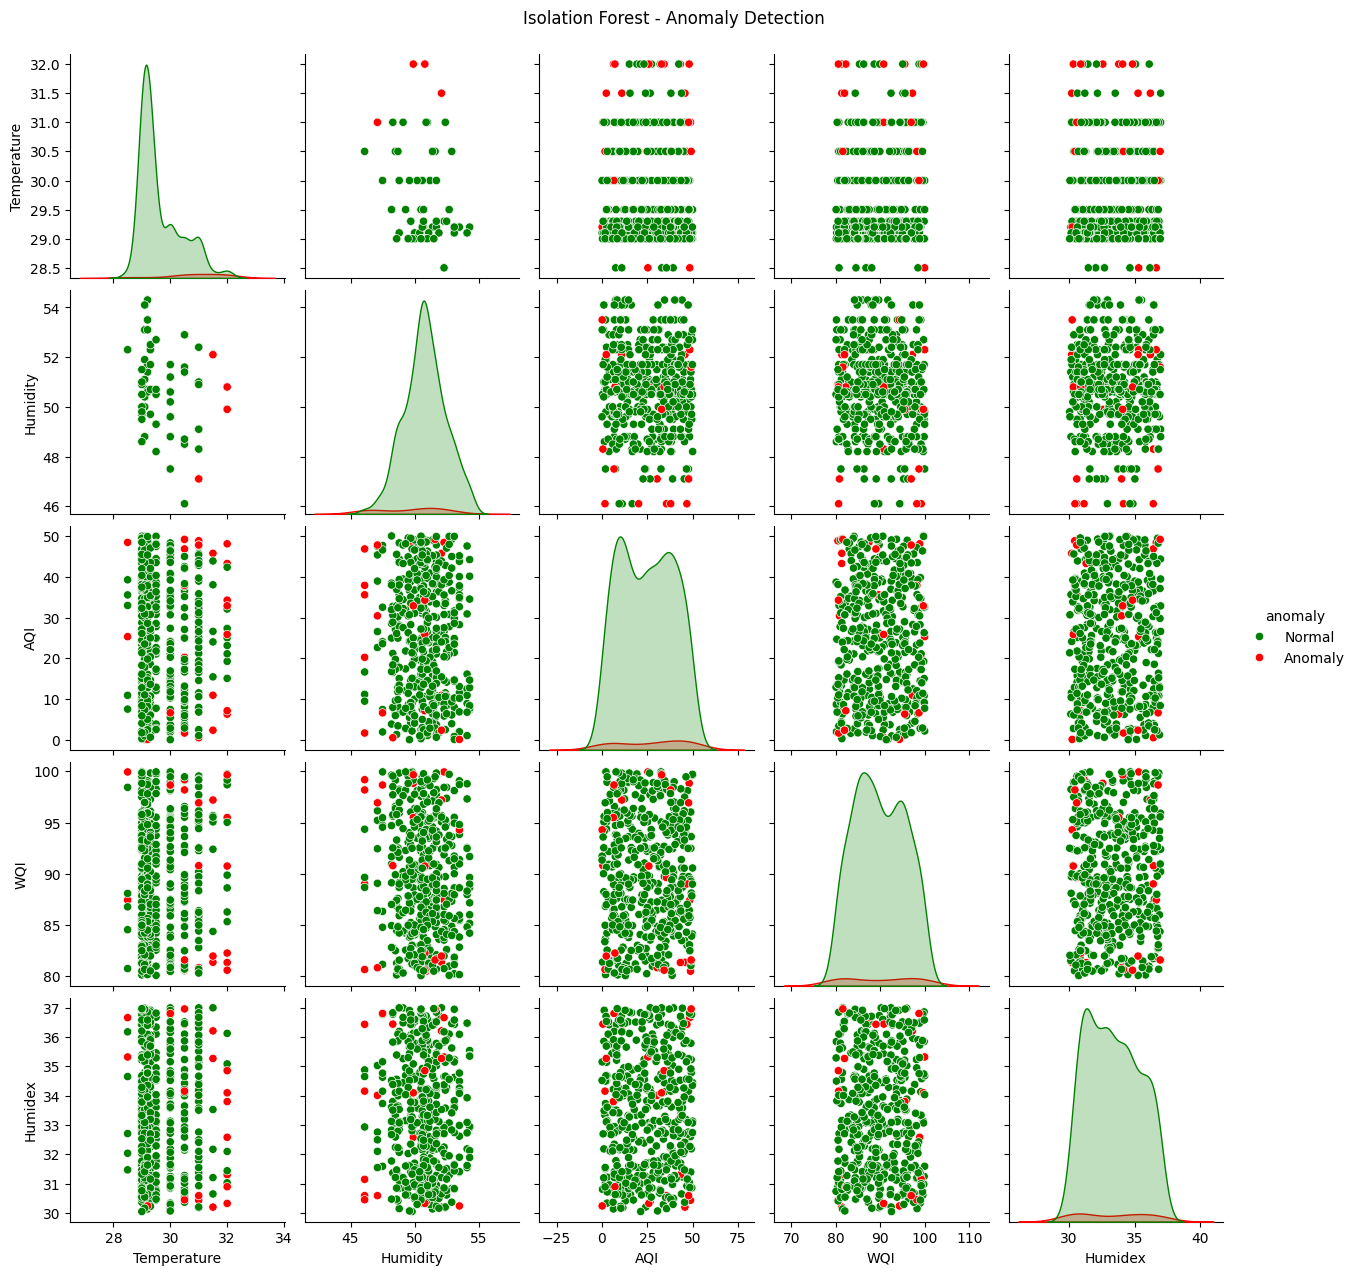

In [7]:

sns.pairplot(df, hue='anomaly', vars=features, palette={'Normal': 'green', 'Anomaly': 'red'})
plt.suptitle("Isolation Forest - Anomaly Detection", y=1.02)
plt.show()


In [8]:
from sklearn.cluster import KMeans

# Try clustering into 3 groups: optimal, suboptimal, hazardous
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)


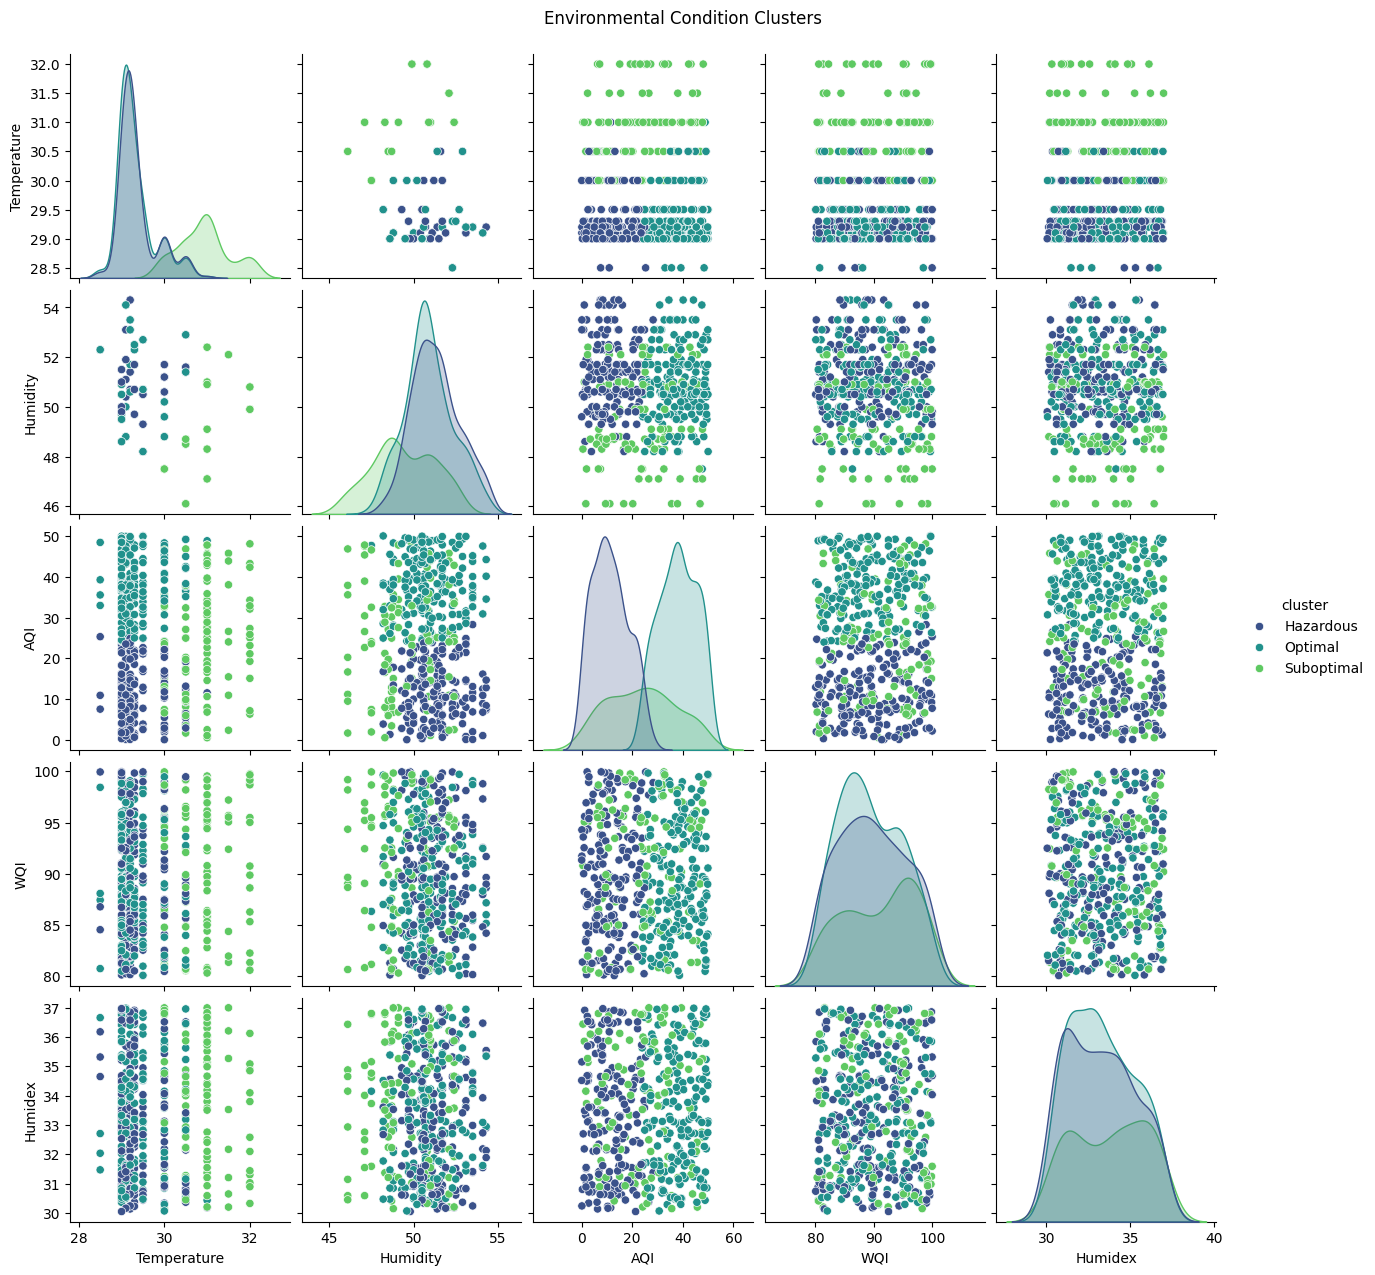

In [9]:
# Mapping the cluster labels to meaningful labels
cluster_labels = {0: 'Optimal', 1: 'Suboptimal', 2: 'Hazardous'}

# Apply the mapping to the cluster column
df['cluster'] = df['cluster'].map(cluster_labels)

# Create the pairplot with the meaningful labels
sns.pairplot(df, hue='cluster', vars=features, palette='viridis')
plt.suptitle("Environmental Condition Clusters", y=1.02)
plt.show()

In [35]:
import pandas as pd

# Load dataset with proper delimiter
file_path = "C:\\Users\\aswin\\OneDrive\\Desktop\\Torch Projects\\Chicken-Disease\\Notebooks\\tempdata.csv"
df = pd.read_csv(file_path, encoding='utf-8')

# Print the first few rows of the dataset to inspect it
print("Dataset preview:")
print(df.head())

# Check the columns again after re-loading the dataset
print("Columns in the dataset:", df.columns)


Dataset preview:
   Amount_of_chicken  Temperature  Humidity        AQI        WQI    Humidex
0               2728         29.3      51.7  21.957796  95.950538  35.016212
1               2728         29.3      52.3   8.731716  88.559769  35.822153
2               2728         29.3      52.5   8.402340  93.361755  34.277358
3               2728         29.3      49.7  14.466574  98.947226  33.320641
4               2728         29.2      51.4  15.774947  94.584586  30.619136
Columns in the dataset: Index(['Amount_of_chicken', 'Temperature', 'Humidity', 'AQI', 'WQI',
       'Humidex'],
      dtype='object')


In [36]:
# Clean column names for consistency
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Print the cleaned columns to verify
print("Cleaned columns:", df.columns)


Cleaned columns: Index(['amount_of_chicken', 'temperature', 'humidity', 'aqi', 'wqi',
       'humidex'],
      dtype='object')


In [37]:
# Define a target variable (1 for healthy, 0 for unhealthy)
def classify_health(temp):
    return 1 if 37.5 <= temp <= 39.0 else 0  # Adjust based on your threshold

# Apply the classification function to create 'health_status' column
df["health_status"] = df["temperature"].apply(classify_health)

# Define features (X) and target (y)
X = df[['amount_of_chicken', 'humidity', 'aqi', 'wqi', 'humidex']]  # Features
y = df['health_status']  # Target variable

# Drop rows with missing values (if any)
df = df.dropna()

# Check the data preparation
print("Features and target variable preview:")
print(X.head(), y.head())


Features and target variable preview:
   amount_of_chicken  humidity        aqi        wqi    humidex
0               2728      51.7  21.957796  95.950538  35.016212
1               2728      52.3   8.731716  88.559769  35.822153
2               2728      52.5   8.402340  93.361755  34.277358
3               2728      49.7  14.466574  98.947226  33.320641
4               2728      51.4  15.774947  94.584586  30.619136 0    0
1    0
2    0
3    0
4    0
Name: health_status, dtype: int64


In [49]:
import os
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df = pd.read_csv("C:\\Users\\aswin\\OneDrive\\Desktop\\Torch Projects\\Chicken-Disease\\Notebooks\\tempdata.csv")  # Replace with your actual CSV path

# Feature and target split
X = df.drop("Amount_of_chicken", axis=1)
y = df["Amount_of_chicken"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training
print("[INFO] Training RandomForestClassifier...")
model.fit(X_train, y_train)

# Evaluation
y_pred = model.predict(X_test)
print("\n[INFO] Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Save model
os.makedirs(os.path.join(os.getcwd(), "models"), exist_ok=True)
MODEL_NAME = "chicken_temp_predictor.pkl"
MODEL_PATH = os.path.join(os.getcwd(), "models", MODEL_NAME)

joblib.dump(model, MODEL_PATH)
print(f"\n[INFO] Model saved to: {MODEL_PATH}")


[INFO] Training RandomForestClassifier...

[INFO] Model Evaluation:
Accuracy: 0.6804
Classification Report:
              precision    recall  f1-score   support

        2639       1.00      0.50      0.67         2
        2640       0.00      0.00      0.00         2
        2642       0.00      0.00      0.00         8
        2643       0.00      0.00      0.00         4
        2645       1.00      1.00      1.00         1
        2646       0.69      1.00      0.82         9
        2649       0.00      0.00      0.00         2
        2654       1.00      1.00      1.00         2
        2673       1.00      1.00      1.00         4
        2712       1.00      1.00      1.00         1
        2721       0.00      0.00      0.00         5
        2728       0.42      0.81      0.55        16
        2730       1.00      0.50      0.67         6
        2732       0.88      1.00      0.93         7
        2735       0.50      0.75      0.60         4
        2736       1.00    

c:\Users\aswin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\aswin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\aswin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [50]:
import os

In [51]:
os.makedirs(os.path.join(os.getcwd(), "models"), exist_ok=True)

# Define model path
MODEL_NAME = "chicken_disease_classifier.pkl"
MODEL_PATH = os.path.join(os.getcwd(), "models", MODEL_NAME)